In [20]:
import pandas as pd

In [21]:
import seaborn as sns

## All columns

In [22]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [23]:
penguins['sex'] = penguins['sex'].fillna("unknown")
penguins = penguins.fillna(0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [32]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names = features,
                          filled=True, rounded=True,
                          special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

In [26]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exceptions("The amount of predictions did not equal the amount of actuals")
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

### Test/train split

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
penguin_train, penguin_test = tts(penguins, test_size=0.3, stratify=penguins['species'], random_state=44)
print(penguin_train.shape, penguin_test.shape)

(240, 7) (104, 7)


### training the model

In [35]:
features = ['body_mass_g', 'bill_length_mm']
dt = dtr(max_depth = 3)
dt.fit(penguin_train[features], penguin_train['bill_depth_mm'])

DecisionTreeRegressor(max_depth=3)

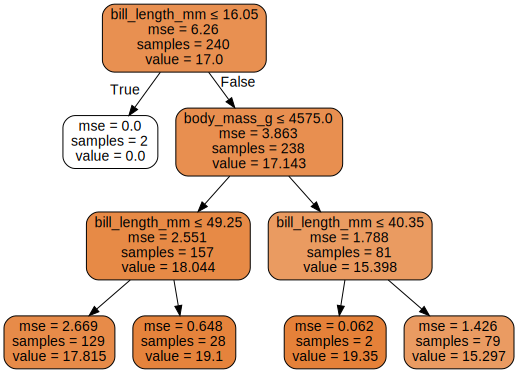

In [36]:
plot_tree_regression(dt, features)

In [38]:
predictionsOnTrainSet = dt.predict(penguin_train[features])
predictionsOnTestSet = dt.predict(penguin_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, penguin_train.bill_depth_mm)
rmseTest = calculate_rmse(predictionsOnTestSet, penguin_test.bill_depth_mm)

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 1.4071639758375147
RMSE on test set 1.690109552694925


I wasn't expection the rmse to be above 1 and I also wasn't expecting the tet set to have a highter rmse.